<a href="https://colab.research.google.com/github/Benteaux/sketchbook/blob/main/actinfTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pymdp-rtd.readthedocs.io/en/latest/notebooks/active_inference_from_scratch.html

In [ ]:
!pip install inferactively-pymdp

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# plot 2d likelihood matrix as heatmap
def plot_likelihood(matrix, xlabels = list(range(9)), ylabels = list(range(9)), title_str = 'Likelihood distribution (A)'):

  if not np.isclose(matrix.sum(axis = 0), 1.0).all():
    raise ValueError("bro you gotta normalize by columns")

  fig = plt.figure(figsize = (6,6))
  ax = sns.heatmap(matrix, xticklabels = xlabels, yticklabels = ylabels, cmap = 'gray', cbar = False, vmin = 0.0, vmax = 1.0)
  plt.title(title_str)
  plt.show()

# plot coordinates of gridworld as heatmap, with each (x, y) coordinate labeled w/ "linear index" ("state id")
def plot_grid(grid_locations, num_x = 3, num_y = 3):
  grid_heatmap = np.zeros((num_x, num_y))
  for linear_idx, location in enumerate(grid_locations):
    y, x = location # why is it y, x?
    grid_heatmap[y, x] = linear_idx
  sns.set(font_scale = 1.5)
  sns.heatmap(grid_heatmap, annot = True, cbar = False, fmt = '.0f', cmap = 'crest')

# plot the agent on the grid world
def plot_point_on_grid(state_vector, grid_locations):
  state_index = np.where(state_vector)[0][0]
  y, x = grid_locations[state_index]
  grid_heatmap = np.zeros((3, 3))
  grid_heatmap[y, x] = 1.0
  sns.heatmap(grid_heatmap, cbar = False, fmt = '.0f')

# plot categorical / belief distribution from the 1d vector "belief_dist"
def plot_beliefs(belief_dist, title_str = ""):
  if not np.isclose(belief_dist.sum(), 1.0):
    raise ValueError("woah bro that's gotta be normalized")

  plt.grid(zorder = 0)
  plt.bar(range(belief_dist.shape[0]), belief_dist, color = 'r', zorder = 3)
  plt.xticks(range(belief_dist.shape[0]))
  plt.title(title_str)
  plt.show()

In [4]:
from pymdp import utils

In [5]:
my_categorical = np.random.rand(3)
print(my_categorical)
my_categorical = utils.norm_dist(my_categorical) # normalizes so it integrates to 1 (it's not bell shaped necessarily)
print(my_categorical.reshape(-1, 1))
print(f'Distribution integral: {round(my_categorical.sum(), 2)}')

[0.20170238 0.63962875 0.10849443]
[[0.21235729]
 [0.67341707]
 [0.11422564]]
Distribution integral: 1.0


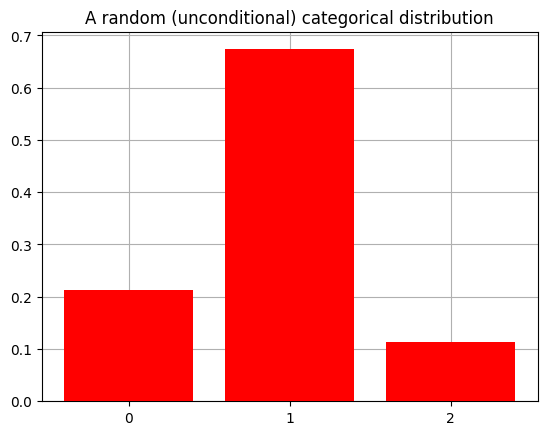

In [6]:
plot_beliefs(my_categorical, title_str = "A random (unconditional) categorical distribution")

In [7]:
p_x_given_y = np.random.rand(3, 4)
print(p_x_given_y)

[[0.16597975 0.72870092 0.5281147  0.3367313 ]
 [0.29117181 0.4137661  0.85188639 0.21231261]
 [0.92160515 0.03112587 0.48841641 0.44574445]]


In [8]:
p_x_given_y = utils.norm_dist(p_x_given_y)
print(p_x_given_y.round(3))

[[0.12  0.621 0.283 0.338]
 [0.211 0.353 0.456 0.213]
 [0.668 0.027 0.261 0.448]]


In [9]:
print(f'Integral of the first column, P(X | Y = 0): {p_x_given_y[:, 0].sum()}')

Integral of the first column, P(X | Y = 0): 1.0


In [10]:
print(f'Integral of the first row: {p_x_given_y[0, :].sum()}')

Integral of the first row: 1.3624470939705176


In [11]:
p_y = np.array([0.75, 0.25])

In [12]:
p_x_given_y = np.array([[0.6, 0.5], [0.15, 0.41], [0.25, 0.09]])

In [13]:
p_x_given_y

array([[0.6 , 0.5 ],
       [0.15, 0.41],
       [0.25, 0.09]])

In [14]:
E_x_wrt_y = p_x_given_y.dot(p_y)

In [15]:
E_x_wrt_y

array([0.575, 0.215, 0.21 ])

In [16]:
p_x_given_y.shape, p_y.shape

((3, 2), (2,))

In [17]:
E_x_wrt_y.sum()

0.9999999999999999

In [18]:
p_y

array([0.75, 0.25])

In [19]:
0.6 * 0.75 + 0.5 * 0.25

0.575

In [20]:
import itertools
grid_locations = list(itertools.product(range(3), repeat =2))

In [21]:
grid_locations

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

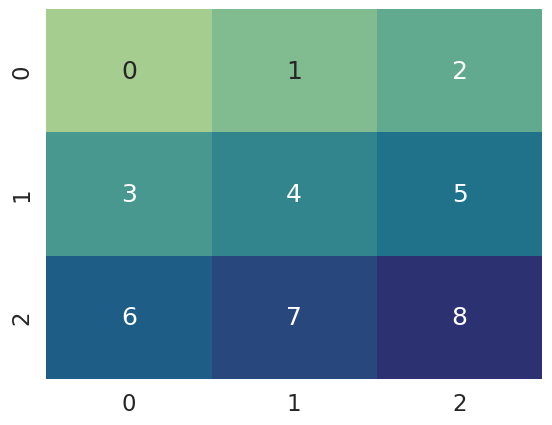

In [22]:
plot_grid(grid_locations)

In [23]:
list(itertools.product(range(3), repeat =2))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [24]:
list(itertools.product(range(4)))

[(0,), (1,), (2,), (3,)]

In [25]:
n_states = len(grid_locations)
n_observations = len(grid_locations)

In [26]:
A = np.zeros( (n_states, n_observations))

In [27]:
np.fill_diagonal(A, 1.0)

In [28]:
A

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

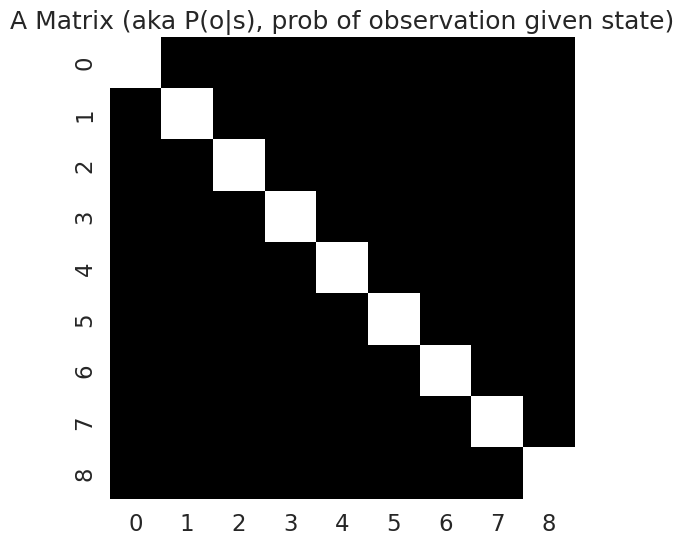

In [29]:
plot_likelihood(A, title_str = "A Matrix (aka P(o|s), prob of observation given state)")

In [30]:
A_noisy = A.copy()
A_noisy[0, 0] = 1 / 3.0 # P(o == 0 | s == 0) = 0.333
A_noisy[1, 0] = 1 / 3.0 # P(o == 1 | s == 0) = 0.333 # step right
A_noisy[3, 0] = 1 / 3.0 # P(o == 3 | s == 0) = 0.333 # step down

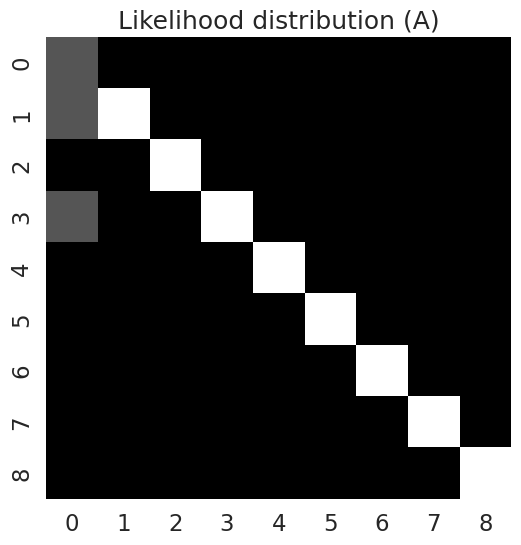

In [31]:
plot_likelihood(A_noisy)

In [32]:
A_reallyNoisy = A_noisy.copy()
A_reallyNoisy[3, 6] = 1.0 / 4.0
A_reallyNoisy[4, 6] = 1.0 / 4.0
A_reallyNoisy[6, 6] = 1.0 / 4.0
A_reallyNoisy[7, 6] = 1.0 / 4.0

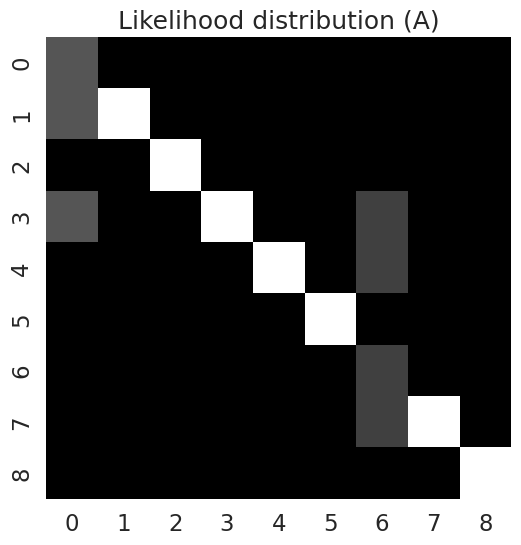

In [33]:
plot_likelihood(A_reallyNoisy)

In [34]:
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT', 'STAY']

def create_B_matrix():
  B = np.zeros( (len(grid_locations), len(grid_locations), len(actions)))

  for action_id, action_label in enumerate(actions):

    for curr_state, grid_location in enumerate(grid_locations):
      y, x = grid_location

      if action_label == 'UP':
        next_y = y - 1 if y > 0 else y
        next_x = x
      elif action_label == "DOWN":
        next_y = y + 1 if y < 2 else y
        next_x = x
      elif action_label == "RIGHT":
        next_y = y
        next_x = x + 1 if x < 2 else x
      elif action_label == "LEFT":
        next_y = y
        next_x = x - 1 if x > 0 else x
      elif action_label == "STAY":
        next_y = y
        next_x = x
      new_location = (next_y, next_x)
      next_state = grid_locations.index(new_location)
      B[next_state, curr_state, action_id] = 1.0
  return B
# for each state, if, for example, the given action is "UP," there's a 100% chance of going up (or staying in the same location if going up would take you off the map)

In [35]:
B = create_B_matrix()

In [36]:
B.shape # next_state by current_state by action_id

(9, 9, 5)

In [37]:
# at the "Let's now explore what it looks to 'take' an action" part

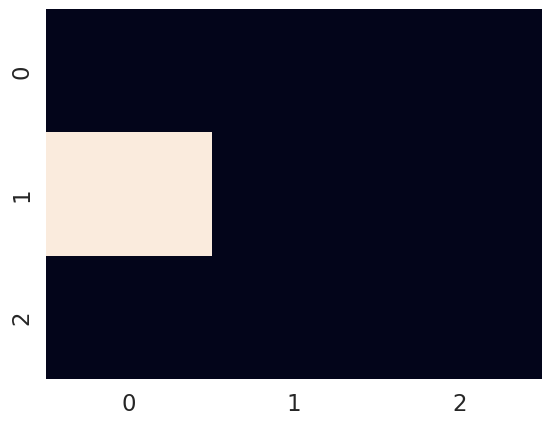

In [39]:
starting_location = (1, 0)

starting_index = grid_locations.index(starting_location)

starting_state = utils.onehot(starting_index, n_states)

plot_point_on_grid(starting_state, grid_locations)

In [42]:
starting_index, n_states, starting_state

(3, 9, array([0., 0., 0., 1., 0., 0., 0., 0., 0.]))

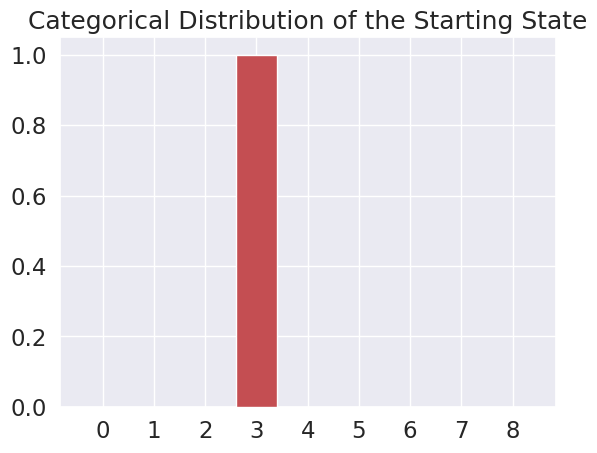

In [40]:
plot_beliefs(starting_state, "Categorical Distribution of the Starting State")

In [48]:
right_action_idx = actions.index('RIGHT')
next_state = B[:, :, right_action_idx].dot(starting_state)

In [53]:
B[:, :, right_action_idx]
# index (2, 1) in the following matrix indicates that, if in state 1, to get to state 2,
# the probability that you have to (or that you will) move right is 1.0

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [50]:
B.shape # grid locations x grid locations x actions
# next_state, current_state, action_id = 1.0

(9, 9, 5)

In [56]:
starting_state

array([0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [57]:
next_state

array([0., 0., 0., 0., 1., 0., 0., 0., 0.])

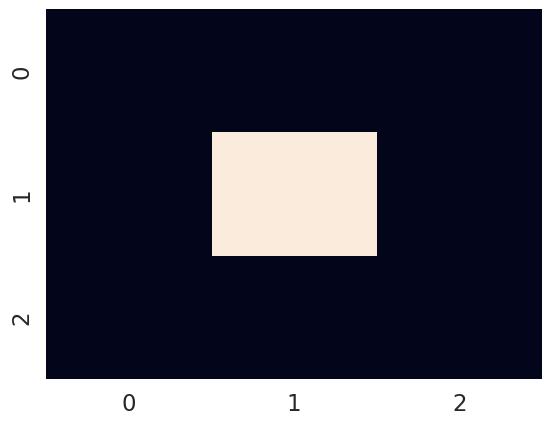

In [49]:
plot_point_on_grid(next_state, grid_locations)

In [60]:
down_ix = actions.index('DOWN')
next_state = B[:, :, down_ix].dot(next_state)

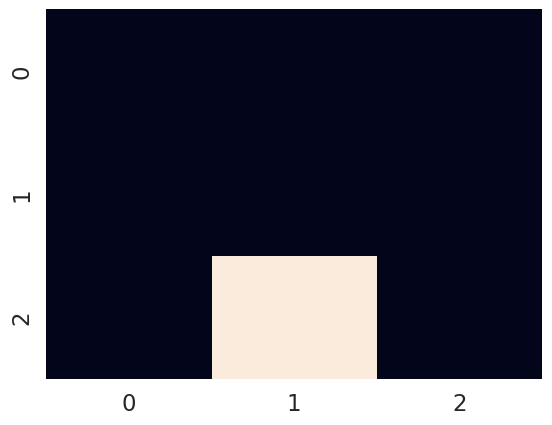

In [61]:
plot_point_on_grid(next_state, grid_locations)

In [65]:
C = np.zeros(n_observations)
desired_location = (2, 2)
desired_location_index = grid_locations.index(desired_location)
C[desired_location_index] = 1.0

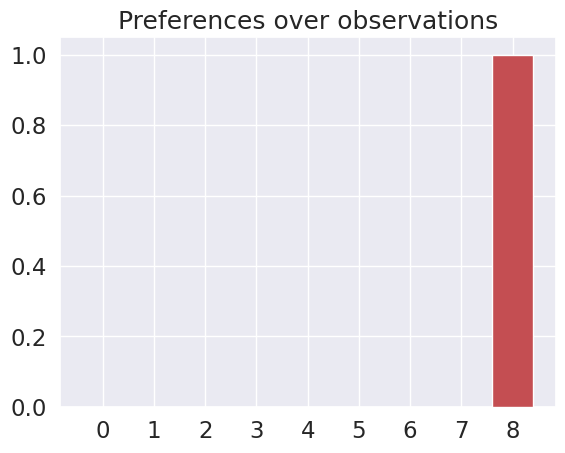

In [66]:
plot_beliefs(C, title_str = "Preferences over observations")

In [67]:
# D vector = belief agent has about its own starting location
D = utils.onehot(0, n_states)

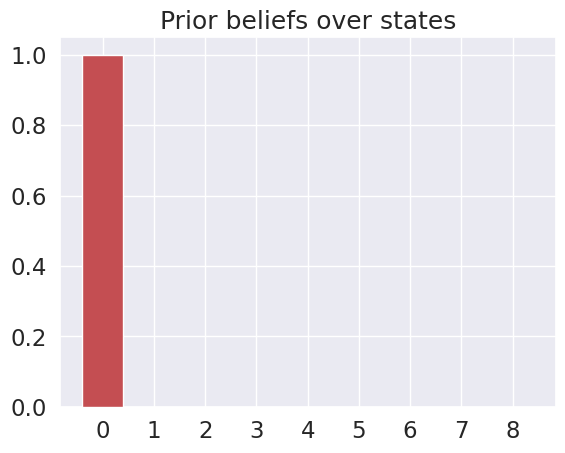

In [68]:
# a noisy prior belief about states can be made with
# D = utils.norm_dist(np.ones(n_states))
plot_beliefs(D, title_str = "Prior beliefs over states")

In [70]:
from pymdp.maths import softmax
from pymdp.maths import spm_log_single as log_stable

In [71]:
def infer_states(observation_index, A, prior):

  log_likelihood = log_stable(A[observation_index, :])
  log_prior = log_stable(prior)
  qs = softmax(log_likelihood + log_prior)

  return qs

In [72]:
qs_past = utils.onehot(4, n_states) # agent beliefs they were at location 4, 1 timestep ago
last_action = 'UP' # the agent knows it moved UP one timestep ago
action_id = actions.index(last_action)

In [83]:
prior = B[:, :, action_id].dot(qs_past)
observation_index = 8 # a value of 8 means the agent sees itself in position (2, 2), or state 8

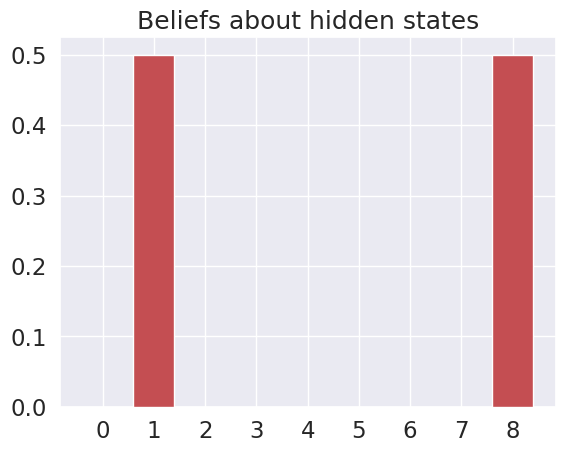

In [84]:
qs_new = infer_states(observation_index, A, prior)
plot_beliefs(qs_new, title_str = "Beliefs about hidden states")

In [85]:
def get_expected_states(B, qs_current, action): # what state do we expect to be in given a next action
  qs_u = B[:, :, action].dot(qs_current)

  return qs_u

def get_expected_observations(A, qs_u): # what do we expect to observe given the next state
  qo_u = A.dot(qs_u)

  return qo_u

def entropy(A): # compute an entropy value per column, aka the entropy of each set of conditional distributions
  H_A = - (A * log_stable(A)).sum(axis = 0)

  return H_A

def kl_divergence(qo_u, C): # kl divergence is used to calculate free energies, which are the difference btwn what
# one expects to happen & what does happen / what one expects to happen & what's currently happening
# here, it's computed between 2 1D categorical distributions
  return (log_stable(qo_u) - log_stable(C)).dot(qo_u)

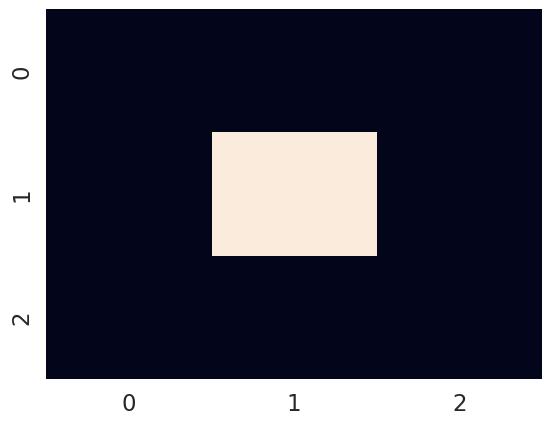

In [86]:
state_idx = grid_locations.index((1, 1))
state_vector = utils.onehot(state_idx, n_states)
plot_point_on_grid(state_vector, grid_locations)

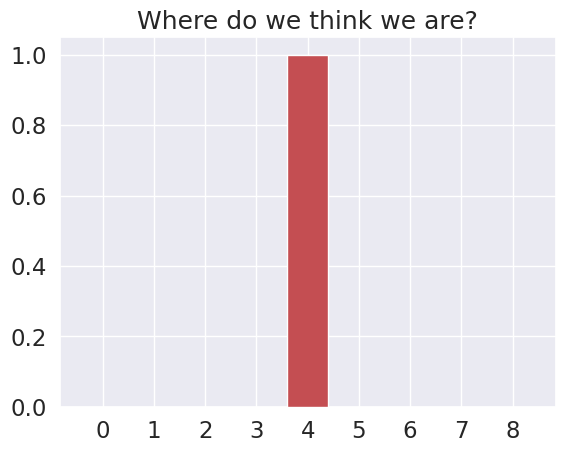

In [88]:
# qs_current = the true starting state, aka our belief is accurate
qs_current = state_vector.copy()
plot_beliefs(qs_current, title_str = "Where do we think we are?")

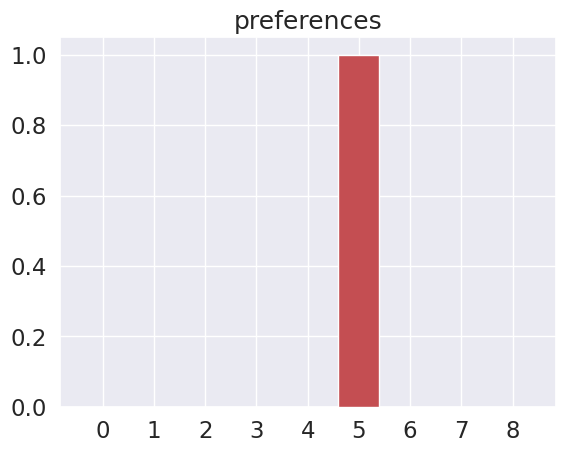

In [91]:
desired_idx = grid_locations.index((1, 2))
C = utils.onehot(desired_idx, n_observations)
plot_beliefs(C, title_str = "preferences")

In [93]:
# compute expected free enegies of moving left vs right

G = np.zeros(2) # storing expected free energies here

# G for MOVE LEFT:
left_idx = actions.index('LEFT')
qs_u_left = get_expected_states(B, qs_current, left_idx)

H_A = entropy(A)
qo_u_left = get_expected_observations(A, qs_u_left)

# entropy of A (probs of observations given states) dot producted w/ the state we'll be in if we go left
predicted_uncertainty_left = H_A.dot(qs_u_left) # uncertainty for left movement, not remaining uncertainty
predicted_divergence_left = kl_divergence(qo_u_left, C) # difference between where we'll likely be and where we want to be
G[0] = predicted_uncertainty_left + predicted_divergence_left # uncertainty of where we'll be + diff from above

# G for MOVE RIGHT:

right_idx = actions.index("RIGHT")
qs_u_right = B[:, :, right_idx].dot(qs_current)
qo_u_right = A.dot(qs_u_right)

predicted_uncertainty_right = H_A.dot(qs_u_right)
predicted_divergence_right = kl_divergence(qo_u_right, C)
G[1] = predicted_uncertainty_right + predicted_divergence_right

In [94]:
print(f'Expected free energy of moving left: {G[0]}\n')
print(f'Expected free energy of moving right: {G[1]}\n')

Expected free energy of moving left: 36.841361487904734

Expected free energy of moving right: 0.0



In [95]:
Q_u = softmax(-G)

In [96]:
Q_u # our new posterior probabilities based on expected free energies, G

array([1.e-16, 1.e+00])

In [97]:
def calculate_G(A, B, C, qs_current, actions):
  G = np.zeros(len(actions))

  H_A = entropy(A)

  for action_i in range(len(actions)):
    qs_u = get_expected_states(B, qs_current, action_i)
    qo_u = get_expected_observations(A, qs_u)

    pred_uncertainty = H_A.dot(qs_u) # expected entropy of A matrix
    pred_div = kl_divergence(qo_u, C) # again, difference between what we expect to see and what we want to see

    G[action_i] = pred_uncertainty + pred_div
  return G

In [98]:
# recipe for Active Inference:
'''
1. Sample an observation, ot, from current state of the environment
2. Perform inference over hidden states (find predicted state and observation)
3. Calculate expected free energies of actions
4. Sample action from the posterior over the actions
5. Use sampled action to change the generative process, and go back to step 1
'''

'\n1. Sample an observation, ot, from current state of the environment\n2. Perform inference over hidden states (find predicted state and observation)\n3. Calculate expected free energies of actions\n4. Sample action from the posterior over the actions\n5. Use sampled action to change the generative process, and go back to step 1\n'

In [99]:
class GridWorldEnv():

  def __init__(self, starting_state = (0, 0)):

    self.init_state = starting_state
    self.current_state = self.init_state
    print(f'Staring state is {starting_state}')

  def step(self, action_label):

    (y, x) = self.current_state

    if action_label == 'UP':
      next_y = y - 1 if y > 0 else y
      next_x = x
    elif action_label == "DOWN":
      next_y = y + 1 if y < 2 else y
      next_x = x
    elif action_label == "RIGHT":
      next_y = y
      next_x = x + 1 if x < 2 else x
    elif action_label == "LEFT":
      next_y = y
      next_x = x - 1 if x > 0 else x
    elif action_label == "STAY":
      next_y = y
      next_x = x

    self.current_state = (next_y, next_x) # store new grid loc

    obs = self.current_state # agent always observes the location they're in perfectly

    return obs

  def reset(self):
    self.current_state = self.init_state
    print(f'Re-initialized loc to {self.init_state}')
    obs = self.current_state
    print(f'... and sampled observation {obs}')

    return obs

In [101]:
A = np.eye(n_observations, n_states)
B = create_B_matrix()
C = utils.onehot(grid_locations.index( (2, 2) ), n_observations) # we want to be in position 8
D = utils.onehot(grid_locations.index( (1, 2) ), n_states) # agent believes at first (prior) it's in location 1, 2


In [103]:
env = GridWorldEnv(starting_state = (1, 2))

Staring state is (1, 2)


In [104]:
def run_active_inference_loop(A, B, C, D, actions, env, T = 5):
  prior = D.copy() # the prior beliefs about where we are

  obs = env.reset() # we're at the starting location

  for t in range(T):
    print(f'Time {t}: Agent observes itself in location: {obs}')

    obs_idx = grid_locations.index(obs)

    # inference over hidden states
    qs_current = infer_states(obs_idx, A, prior)

    plot_beliefs(qs_current, title_str = f'Beliefs about location at time {t}')

    # compute free energies
    G = calculate_G(A, B, C, qs_current, actions)

    # compute posterior
    Q_u = softmax(-G)

    # sample action from posterior
    action = utils.sample(Q_u)

    # prior belief about where we are for next timestep
    prior = B[:, :, action].dot(qs_current)

    action_label = actions[action]

    obs = env.step(action_label)

  return qs_current

Re-initialized loc to (1, 2)
... and sampled observation (1, 2)
Time 0: Agent observes itself in location: (1, 2)


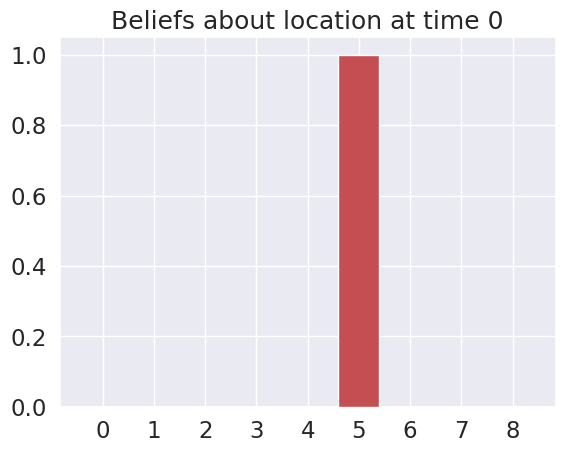

Time 1: Agent observes itself in location: (2, 2)


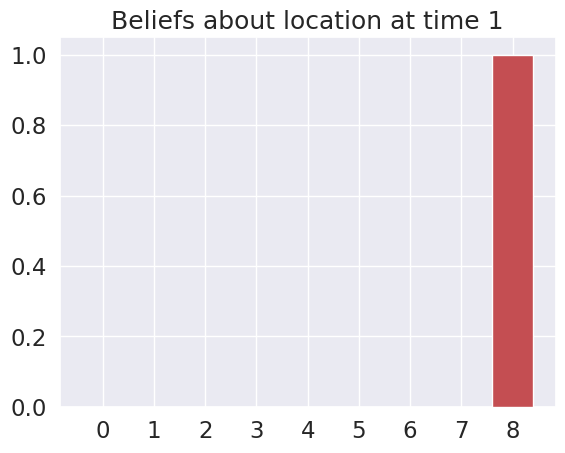

Time 2: Agent observes itself in location: (2, 2)


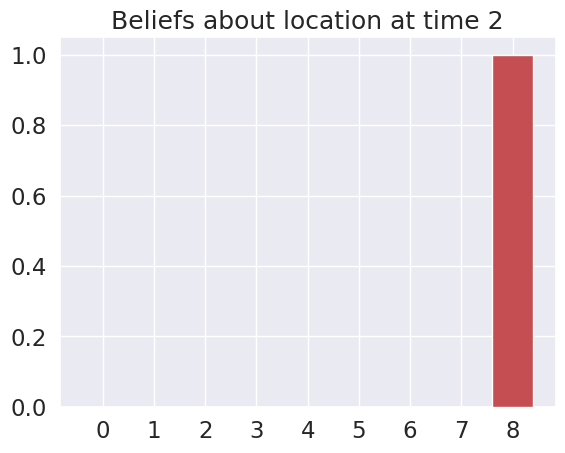

Time 3: Agent observes itself in location: (2, 2)


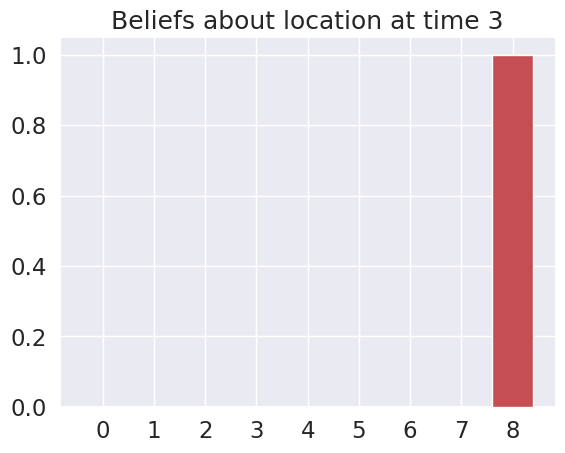

Time 4: Agent observes itself in location: (2, 2)


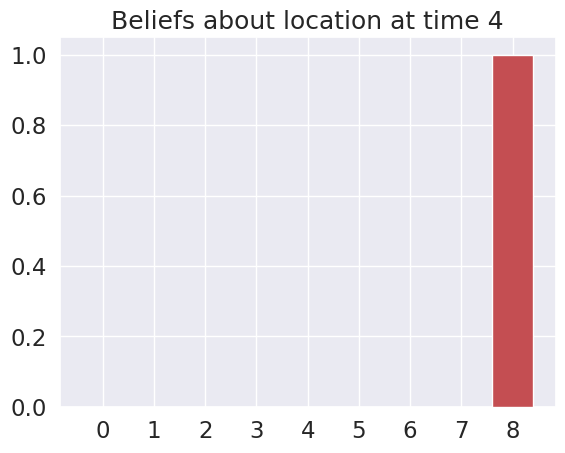

In [105]:
qs = run_active_inference_loop(A, B, C, D, actions, env, T = 5)

In [106]:
from pymdp.control import construct_policies

In [107]:
policy_len = 4
n_actions = len(actions)

all_policies = construct_policies([n_states], [n_actions], policy_len = policy_len)

In [110]:
print(f'total number of policies for {n_actions} possible actions & planning horizon of {policy_len} = {len(all_policies)}')

total number of policies for 5 possible actions & planning horizon of 4 = 625


In [112]:
5**4
# ah, it's because every timestep we have 5 possible actions, so 5*5*5*5 = 625 possible ways this could go

625

In [122]:
# expected free energy function again, but now it accounts for policies instead of singular actions
def calculate_G_policies(A, B, C, qs_current, policies):
  G = np.zeros(len(policies)) # expected free energies for each policy
  H_A = entropy(A)

  for policy_id, policy in enumerate(policies):
    t_horizon = policy.shape[0] # how many timesteps does this policy last

    G_pi = 0.0 # initial expected free energy for this policy
    for t in range(t_horizon):
      action_ix = policy[t, 0] # this policy's action index at timestep t
      # print(action_ix)

      # past predictive posterior is the current state if we just started the policy, or the previous state if we didn't
      if t == 0:
        qs_prev = qs_current
      else:
        qs_prev = qs_pi_t # won't cause an error b/c by the time we call this line, it'll be instantiated

      qs_pi_t = get_expected_states(B, qs_prev, action_ix) # expected states for state, action pair
      qo_pi_t = get_expected_observations(A, qs_pi_t) # like above, but for observations

      kld = kl_divergence(qo_pi_t, C)

      G_pi_t = H_A.dot(qs_pi_t) + kld

      G_pi += G_pi_t # add up free energies for each timestep in the policy

    G[policy_id] += G_pi

  return G


note for self: I don't totally understand the code block right here, try understanding it later

In [123]:
# computing action posterior, given posterior of each policy
def compute_prob_actions(actions, policies, Q_pi):
  P_u = np.zeros(len(actions)) # vector of probabilities of each action

  for policy_id, policy in enumerate(policies):
    P_u[int(policy[0, 0])] += Q_pi[policy_id] # get marginal probability for each action

  P_u = utils.norm_dist(P_u)

  return P_u

In [124]:
def active_inference_with_planning(A, B, C, D, n_actions, env, policy_len = 2, T = 5):
  prior = D

  obs = env.reset()

  policies = construct_policies([n_states], [n_actions], policy_len = policy_len)

  for t in range(T):
    print(f'Time {t}: agent observes self in loc: {obs}')

    obs_idx = grid_locations.index(obs)

    qs_current = infer_states(obs_idx, A, prior)
    plot_beliefs(qs_current, title_str = f'Where the agent thinks it is at timestep {t}')

    G = calculate_G_policies(A, B, C, qs_current, policies)

    # action posteriors for the policies (basically the probabilities of each policy)
    Q_pi = softmax(-G)

    # probability of each action
    P_u = compute_prob_actions(actions, policies, Q_pi)

    chosen_action = utils.sample(P_u)

    prior = B[:, :, chosen_action].dot(qs_current)

    action_label = actions[chosen_action]
    obs = env.step(action_label)

  return qs_current

Staring state is (0, 0)
Re-initialized loc to (0, 0)
... and sampled observation (0, 0)
Time 0: agent observes self in loc: (0, 0)


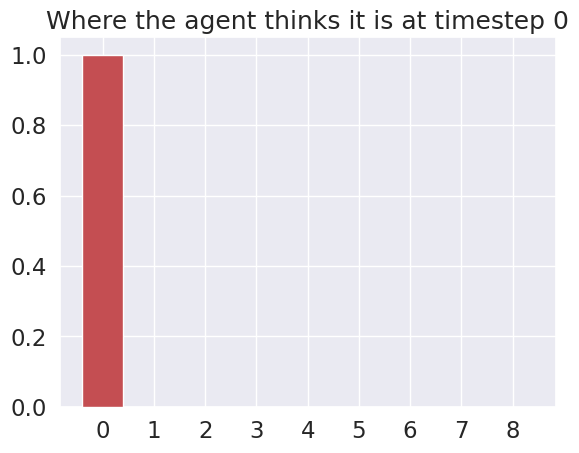

Time 1: agent observes self in loc: (0, 0)


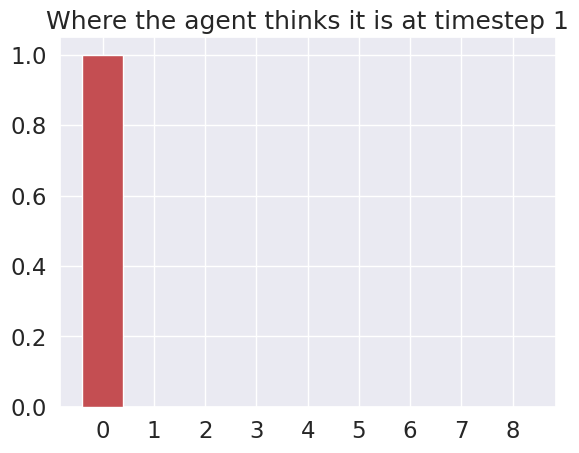

Time 2: agent observes self in loc: (0, 0)


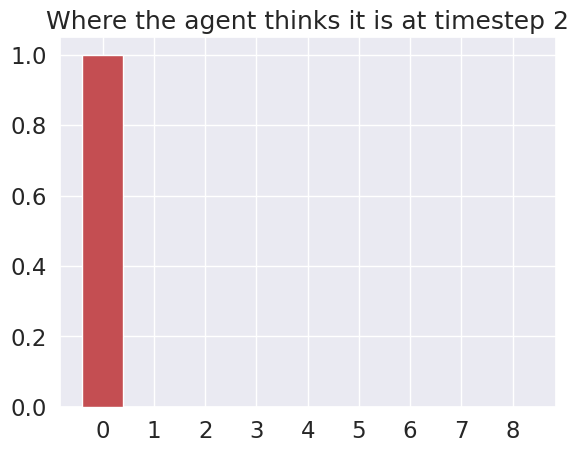

Time 3: agent observes self in loc: (0, 0)


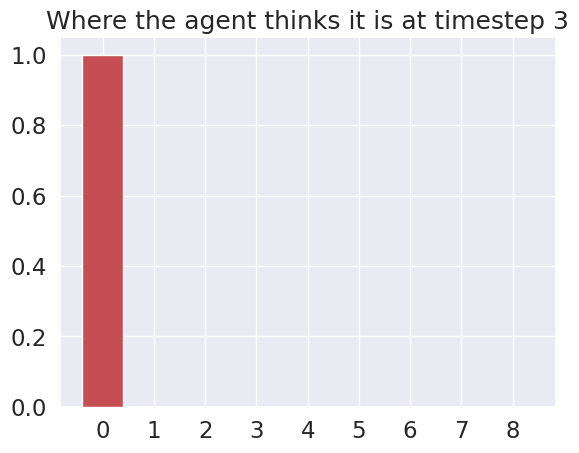

Time 4: agent observes self in loc: (0, 1)


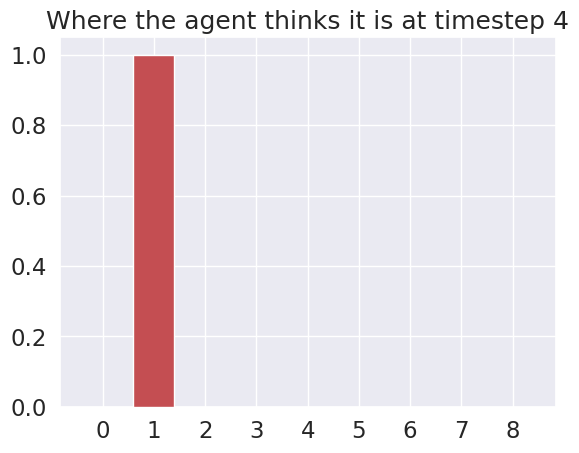

Time 5: agent observes self in loc: (1, 1)


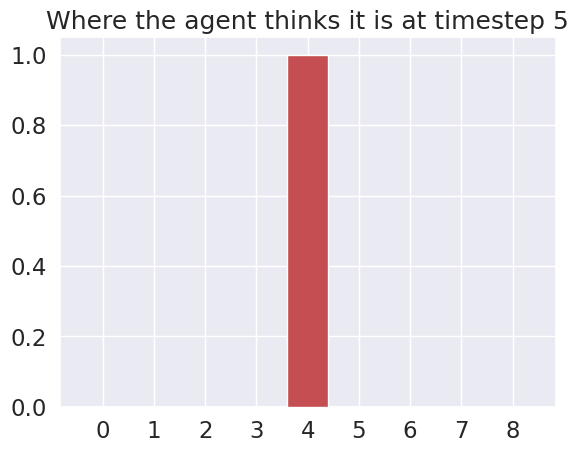

Time 6: agent observes self in loc: (2, 1)


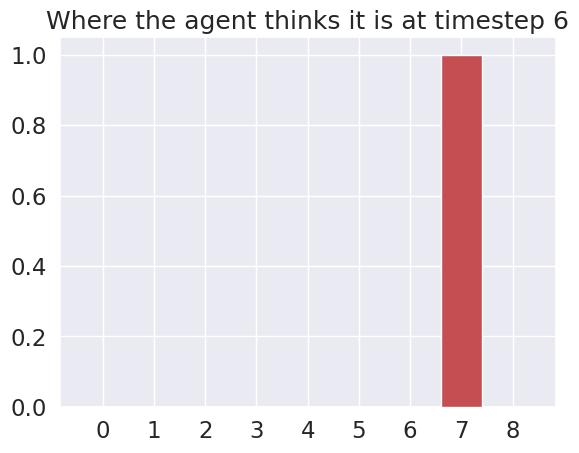

Time 7: agent observes self in loc: (2, 2)


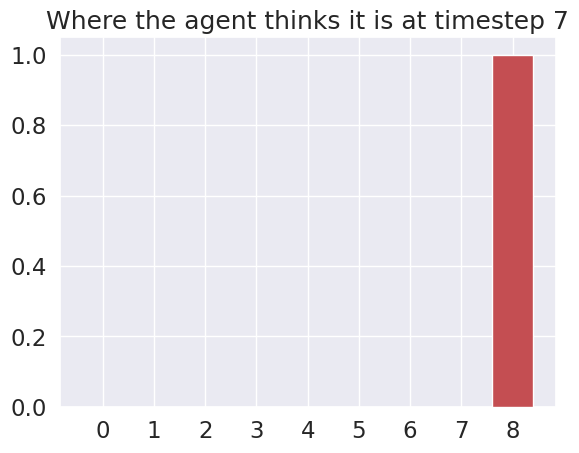

Time 8: agent observes self in loc: (2, 2)


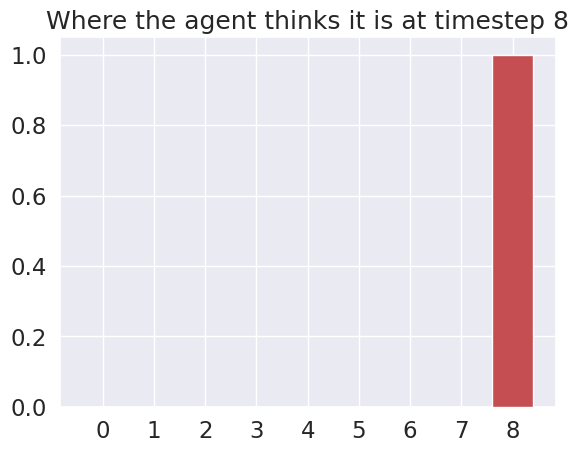

Time 9: agent observes self in loc: (2, 2)


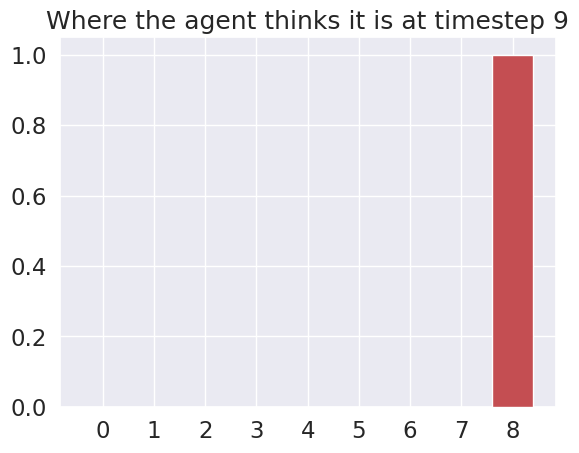

In [125]:
D = utils.onehot(grid_locations.index((0, 0)), n_states)
env = GridWorldEnv(starting_state = (0, 0))
qs_final = active_inference_with_planning(A, B, C, D, n_actions, env, policy_len = 3, T = 10)